In [1]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')

# KOSIS API 통해 주택착공데이터 다운
미국에서 접속해서 그런지 데이터 다운속도가 너무 느림

In [ ]:
apiKey = 'M2U3MTBiYTk2MWU5NTdjYTgxOGIyMjJkYzc0NDlmMTY='
url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList'
params = {
    'apiKey' : apiKey,
    'orgId' : '116',  # 기관 ID
    'tblId' : 'DT_MLTM_5387',   # 통계표 ID
    'objL1' : 'ALL',  # 분류1
    'objL2' : 'ALL',  # 분류2
    'objL3' : 'ALL',  # 분류3
    'objL4' : 'ALL',  # 분류4
    'itmId' : '13103766969T1',  # 항목 ID
    'prdSe' : 'M',  # 수록주기
    'format' : 'json',  # 결과 유형
    'jsonVD' : 'Y'  # json Viewer
}

months = []
for year in range(2011, 2012):
    for month in range(1, 13):
        months.append(f"{year}{month:02d}")

dfs = []

for month in months:
    params['startPrdDe'] = month
    params['endPrdDe'] = month
    r = requests.get(url, params=params)
    json = r.json()
    df = pd.DataFrame(json)
    dfs.append(df)
    time.sleep(1)

begin_df = pd.concat(dfs)
begin_df = begin_df[['C1_NM', 'C2_NM', 'C3_NM', 'C4_NM', 'PRD_DE', 'DT']]
begin_df

# 국토교통 통계누리에서 직접 주택착공데이터 다운
[국토교통 통계누리](https://stat.molit.go.kr/portal/main/portalMain.do) > 주택 > 주택건설실적통계(착공) > 주택유형별 주택건설 착공실적(월계)

In [2]:
col_names = ['month', 'area', 'category_1', 'category_2', 'category_3', 'data_1', 'data_2']
begin_df = pd.read_csv('data/molit_housing_begin.csv', encoding='cp949', names=col_names, skiprows=1)
begin_df

,month,area,category_1,category_2,category_3,data_1,data_2
0,2011-01,총계,계(다가구동수기준),계(다가구동수기준),계(다가구동수기준),10.0,36.0
1,2011-01,총계,계(다가구가구수기준),계(다가구가구수기준),계(다가구가구수기준),14.0,400.0
2,2011-01,총계,단독,단독,단독,1.0,761.0
3,2011-01,총계,단독,다가구,동수,738.0,NaN
4,2011-01,총계,단독,다가구,가구수,5.0,102.0
...,...,...,...,...,...,...,...
29211,2024-10,제주,단독,다가구,동수,7.0,NaN
29212,2024-10,제주,단독,다가구,가구수,20.0,NaN
29213,2024-10,제주,다세대,다세대,다세대,8.0,NaN
29214,2024-10,제주,연립,연립,연립,49.0,NaN


In [3]:
begin_df['data_1'] = begin_df['data_1'].astype(str).str.replace('.0', '')
begin_df['data_2'] = begin_df['data_2'].astype(str).str.replace('.0', '')
begin_df['data'] = np.where(begin_df['data_2'] == 'nan', begin_df['data_1'], begin_df['data_1'] + begin_df['data_2'])
begin_df['data'] = begin_df['data'].astype(float)
begin_df = begin_df.drop(['data_1', 'data_2'], axis=1)

begin_df['year'] = begin_df['month'].str[:4]
begin_df['month'] = begin_df['month'].str[5:]

begin_df = begin_df[['year', 'month', 'area', 'category_1', 'category_2', 'category_3', 'data']]
begin_df

,year,month,area,category_1,category_2,category_3,data
0,2011,01,총계,계(다가구동수기준),계(다가구동수기준),계(다가구동수기준),1036.0
1,2011,01,총계,계(다가구가구수기준),계(다가구가구수기준),계(다가구가구수기준),14400.0
2,2011,01,총계,단독,단독,단독,1761.0
3,2011,01,총계,단독,다가구,동수,738.0
4,2011,01,총계,단독,다가구,가구수,5102.0
...,...,...,...,...,...,...,...
29211,2024,10,제주,단독,다가구,동수,7.0
29212,2024,10,제주,단독,다가구,가구수,20.0
29213,2024,10,제주,다세대,다세대,다세대,8.0
29214,2024,10,제주,연립,연립,연립,49.0


# 국토교통 통계누리에서 직접 주택준공데이터 다운
[국토교통 통계누리](https://stat.molit.go.kr/portal/main/portalMain.do) > 주택 > 주택건설실적통계(준공) > 주택유형별 주택건설 준공실적(월계)

In [4]:
col_names = ['month', 'area', 'category_1', 'category_2', 'category_3', 'data_1', 'data_2']
complete_df = pd.read_csv('data/molit_housing_complete.csv', encoding='cp949', names=col_names, skiprows=1)
complete_df

,month,area,category_1,category_2,category_3,data_1,data_2
0,2010-08,총계,계(다가구동수기준),계(다가구동수기준),계(다가구동수기준),33.0,428.0
1,2010-08,총계,계(다가구가구수기준),계(다가구가구수기준),계(다가구가구수기준),42.0,173.0
2,2010-08,총계,단독,단독,단독,3.0,387.0
3,2010-08,총계,단독,다가구,동수,1.0,347.0
4,2010-08,총계,단독,다가구,가구수,10.0,92.0
...,...,...,...,...,...,...,...
30091,2024-10,제주,단독,다가구,동수,11.0,NaN
30092,2024-10,제주,단독,다가구,가구수,50.0,NaN
30093,2024-10,제주,다세대,다세대,다세대,187.0,NaN
30094,2024-10,제주,연립,연립,연립,15.0,NaN


In [5]:
complete_df['data_1'] = complete_df['data_1'].astype(str).str.replace('.0', '')
complete_df['data_2'] = complete_df['data_2'].astype(str).str.replace('.0', '')
complete_df['data'] = np.where(complete_df['data_2'] == 'nan', complete_df['data_1'], complete_df['data_1'] + complete_df['data_2'])
complete_df['data'] = complete_df['data'].astype(float)
complete_df = complete_df.drop(['data_1', 'data_2'], axis=1)

complete_df['year'] = complete_df['month'].str[:4]
complete_df['month'] = complete_df['month'].str[5:]

complete_df = complete_df[['year', 'month', 'area', 'category_1', 'category_2', 'category_3', 'data']]
complete_df

,year,month,area,category_1,category_2,category_3,data
0,2010,08,총계,계(다가구동수기준),계(다가구동수기준),계(다가구동수기준),33428.0
1,2010,08,총계,계(다가구가구수기준),계(다가구가구수기준),계(다가구가구수기준),42173.0
2,2010,08,총계,단독,단독,단독,3387.0
3,2010,08,총계,단독,다가구,동수,1347.0
4,2010,08,총계,단독,다가구,가구수,1092.0
...,...,...,...,...,...,...,...
30091,2024,10,제주,단독,다가구,동수,11.0
30092,2024,10,제주,단독,다가구,가구수,50.0
30093,2024,10,제주,다세대,다세대,다세대,187.0
30094,2024,10,제주,연립,연립,연립,15.0


# 서울 아파트 착공 및 준공 데이터 분석

In [6]:
seoul_apt_begin = begin_df[(begin_df['area'] == '서울') & (begin_df['category_1'] == '아파트')].copy()
seoul_apt_begin = seoul_apt_begin.groupby(['year'])[['data']].sum()
seoul_apt_begin.reset_index(drop=False, inplace=True)
seoul_apt_begin.rename(columns={'data': 'begin'}, inplace=True)

seoul_apt_complete = complete_df[(complete_df['area'] == '서울') & (complete_df['category_1'] == '아파트')].copy()
seoul_apt_complete = seoul_apt_complete.groupby(['year'])[['data']].sum()
seoul_apt_complete.reset_index(drop=False, inplace=True)
seoul_apt_complete.rename(columns={'data': 'complete'}, inplace=True)

seoul_apt = pd.merge(seoul_apt_begin, seoul_apt_complete, on='year', how='left')
seoul_apt

,year,begin,complete
0,2011,37700.0,38482.0
1,2012,32476.0,26115.0
2,2013,33724.0,33607.0
3,2014,21905.0,39325.0
4,2015,28835.0,19873.0
5,2016,32720.0,33566.0
6,2017,49181.0,29833.0
7,2018,38373.0,41038.0
8,2019,53182.0,37530.0
9,2020,32592.0,51834.0


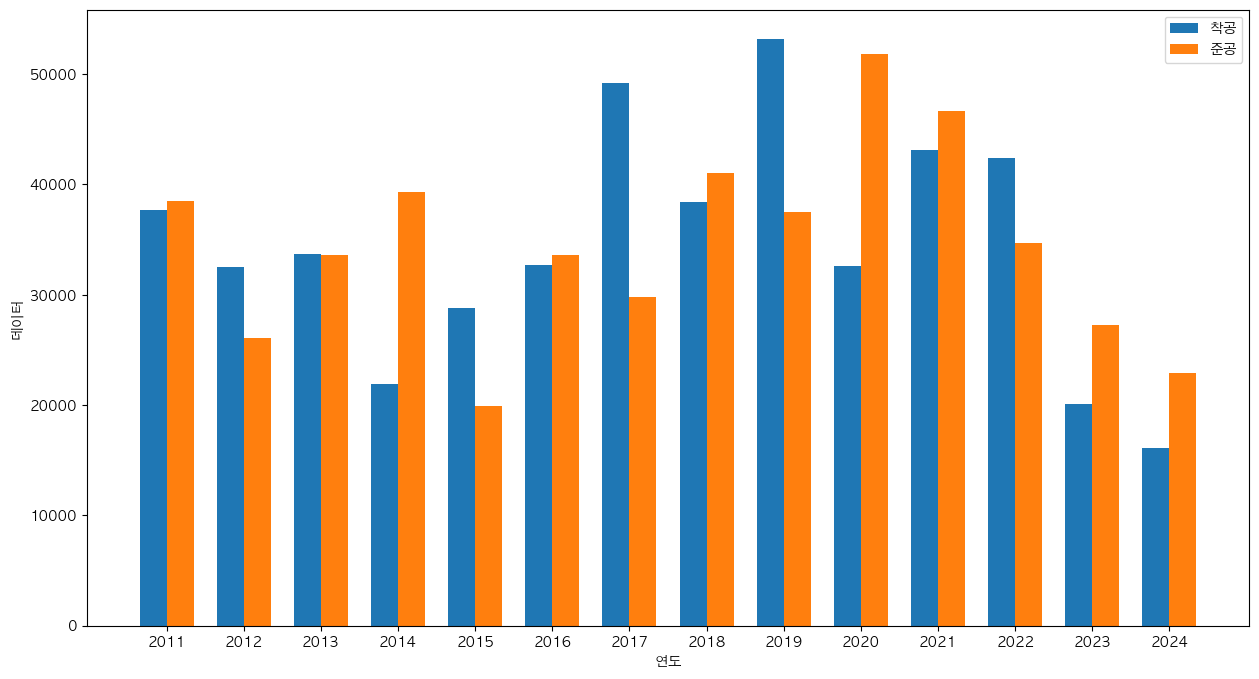

In [7]:
bar_width = 0.35

r1 = np.arange(len(seoul_apt['year']))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(15, 8))
plt.bar(r1, seoul_apt['begin'], width=bar_width, label='착공')
plt.bar(r2, seoul_apt['complete'], width=bar_width, label='준공')

plt.xlabel('연도', fontweight='bold')

years = seoul_apt['year'].tolist()
plt.xticks([r + bar_width/2 for r in range(len(seoul_apt['year']))], years)
plt.ylabel('데이터')

plt.legend()

plt.show()

# 경기, 인천 아파트 착공 및 준공 데이터 분석

In [8]:
capital_area_apt_begin = begin_df[(begin_df['area'].isin(['경기', '인천'])) & (begin_df['category_1'] == '아파트')].copy()
capital_area_apt_begin = capital_area_apt_begin.groupby(['year'])[['data']].sum()
capital_area_apt_begin.reset_index(drop=False, inplace=True)
capital_area_apt_begin.rename(columns={'data': 'begin'}, inplace=True)

capital_area_apt_complete = complete_df[(complete_df['area'].isin(['경기', '인천'])) & (complete_df['category_1'] == '아파트')].copy()
capital_area_apt_complete = capital_area_apt_complete.groupby(['year'])[['data']].sum()
capital_area_apt_complete.reset_index(drop=False, inplace=True)
capital_area_apt_complete.rename(columns={'data': 'complete'}, inplace=True)

capital_area_apt = pd.merge(capital_area_apt_begin, capital_area_apt_complete, on='year', how='left')
capital_area_apt

,year,begin,complete
0,2011,67033.0,81035.0
1,2012,77738.0,79444.0
2,2013,65724.0,55179.0
3,2014,40145.0,57955.0
4,2015,213426.0,69296.0
5,2016,167581.0,99225.0
6,2017,89771.0,134614.0
7,2018,126193.0,194819.0
8,2019,147049.0,127569.0
9,2020,177065.0,125836.0


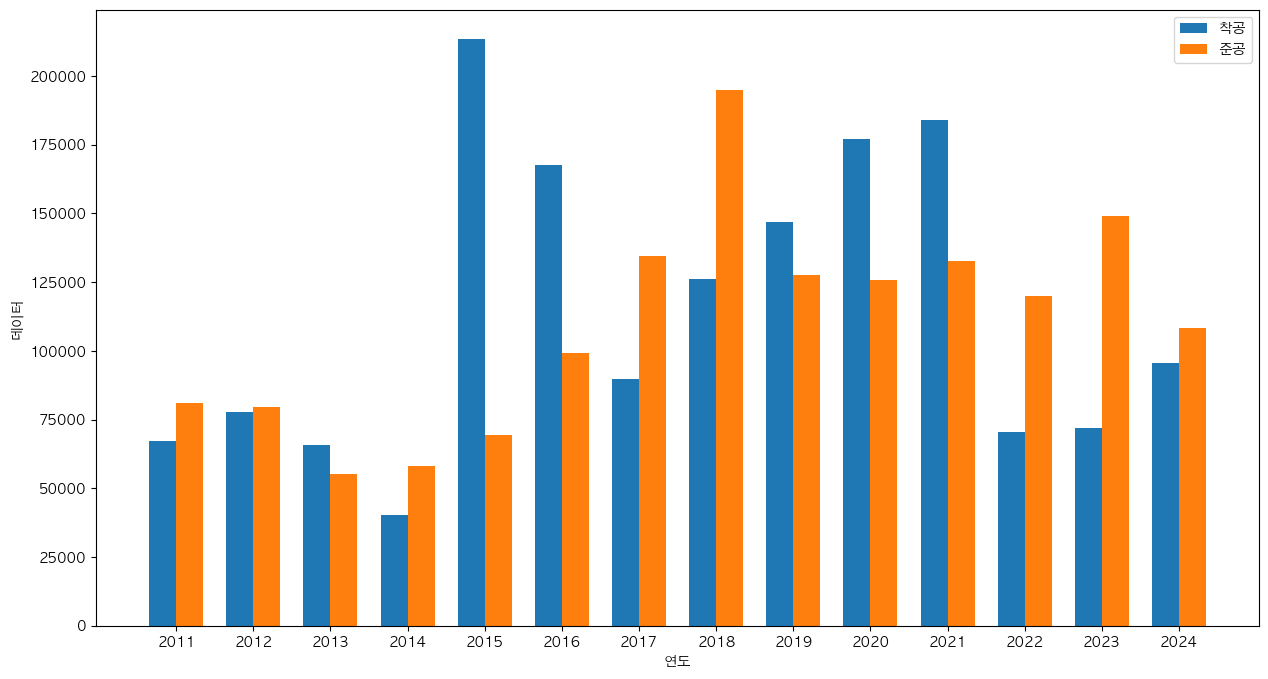

In [9]:
bar_width = 0.35

r1 = np.arange(len(capital_area_apt['year']))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(15, 8))
plt.bar(r1, capital_area_apt['begin'], width=bar_width, label='착공')
plt.bar(r2, capital_area_apt['complete'], width=bar_width, label='준공')

plt.xlabel('연도', fontweight='bold')

years = capital_area_apt['year'].tolist()
plt.xticks([r + bar_width/2 for r in range(len(capital_area_apt['year']))], years)
plt.ylabel('데이터')

plt.legend()

plt.show()